## $Re = 900, Pm = 1, N = 128^3$, white-noise initial velocity perturbation, $\sigma_U = 1\times10^{-8}$, uniform magnetic field $\vec{B}_0 = 1\times10^{-8}\times(\hat\imath + \hat\jmath + \hat{k})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors, ticker
import h5py
from findiff import FinDiff
from numpy import log10 as log

In [2]:
f = h5py.File("out_M8_Re900.0.h5")
B_kt = f["Bk"][2:]
U_kt = f["Uk"][2:]
B_t = f["B_mean"][2:, 0]
U_t = f["U_mean"][2:, 0]
B_kt[B_kt==0.0] = np.nan
U_kt[U_kt==0.0] = np.nan

In [3]:
ts = f["sim_time"][2:]/(2*np.pi)
k = np.arange(1, len(B_kt[0])+1)
kk, tt = np.meshgrid(k, ts)

Compute $\gamma_B = \partial_t(\ln(B(k, t)))$

In [4]:
d_dt = FinDiff(0, ts[1] - ts[0])
gU_kt = d_dt(np.log(U_kt))
gB_kt = d_dt(np.log(B_kt))
gU_kt[(gU_kt > 50)] = np.nan
gB_kt[(gB_kt > 50)] = np.nan
gB_t = d_dt(np.log(B_t))
gU_t = d_dt(np.log(U_t))

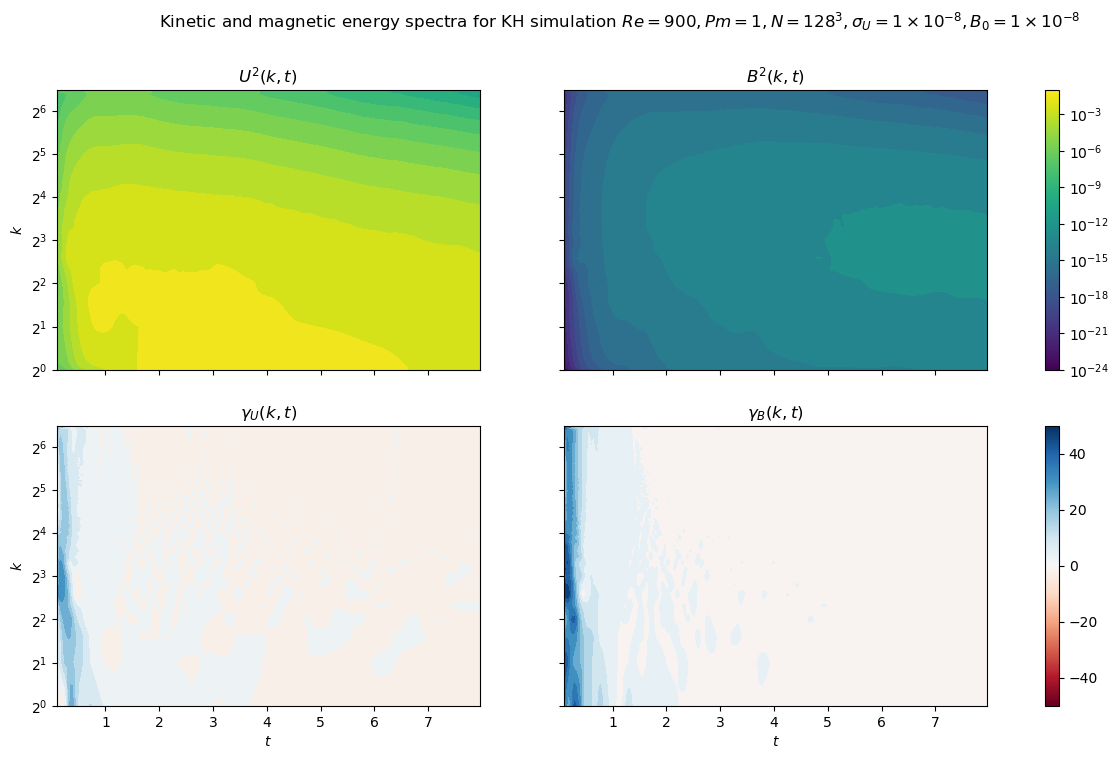

In [5]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15, 8))
datas = np.array([[U_kt, B_kt], [gU_kt, gB_kt]])
titles = np.array([["$U^2(k, t)$", "$B^2(k, t)$"], ["$\gamma_U(k, t)$", "$\gamma_B(k, t)$"]])

for i in (0, 1):
    if not i:
        cmap = colormaps["viridis"]
        normalizer = colors.LogNorm(1e-24, 1e-1)
        im = cm.ScalarMappable(norm=normalizer, cmap=cmap)
        tk=ticker.LogLocator(numticks=30)
    else:
        cmap = colormaps["RdBu"]
        normalizer = colors.Normalize(-50, 50)
        im = cm.ScalarMappable(norm=normalizer, cmap=cmap)
        tk = ticker.LinearLocator()
    for j in (0, 1):
        data = datas[i, j]
        ax = axs[i, j]
        ax.contourf(tt, kk, data, cmap=cmap, norm=normalizer, locator=tk)
        ax.set_yscale("log", base=2)
        ax.set_title(titles[i, j])
        if i:
            ax.set_xlabel("$t$")
        if not j:
            ax.set_ylabel("$k$")
    fig.colorbar(im, ax=axs[i].ravel().tolist())
fig.suptitle(r"Kinetic and magnetic energy spectra for KH simulation $Re = 900, Pm = 1, N = 128^3, \sigma_U = 1\times10^{-8}, B_0 = 1\times10^{-8}$")
plt.savefig("gUB_kt.pdf")

In [6]:
gB_kmaxt = np.nanmax(gB_kt, axis=1)
K_tmaxgB = np.nanargmax(gB_kt, axis=1) + 1
gU_kmaxt = np.nanmax(gU_kt, axis=1)
K_tmaxgU = np.nanargmax(gU_kt, axis=1) + 1

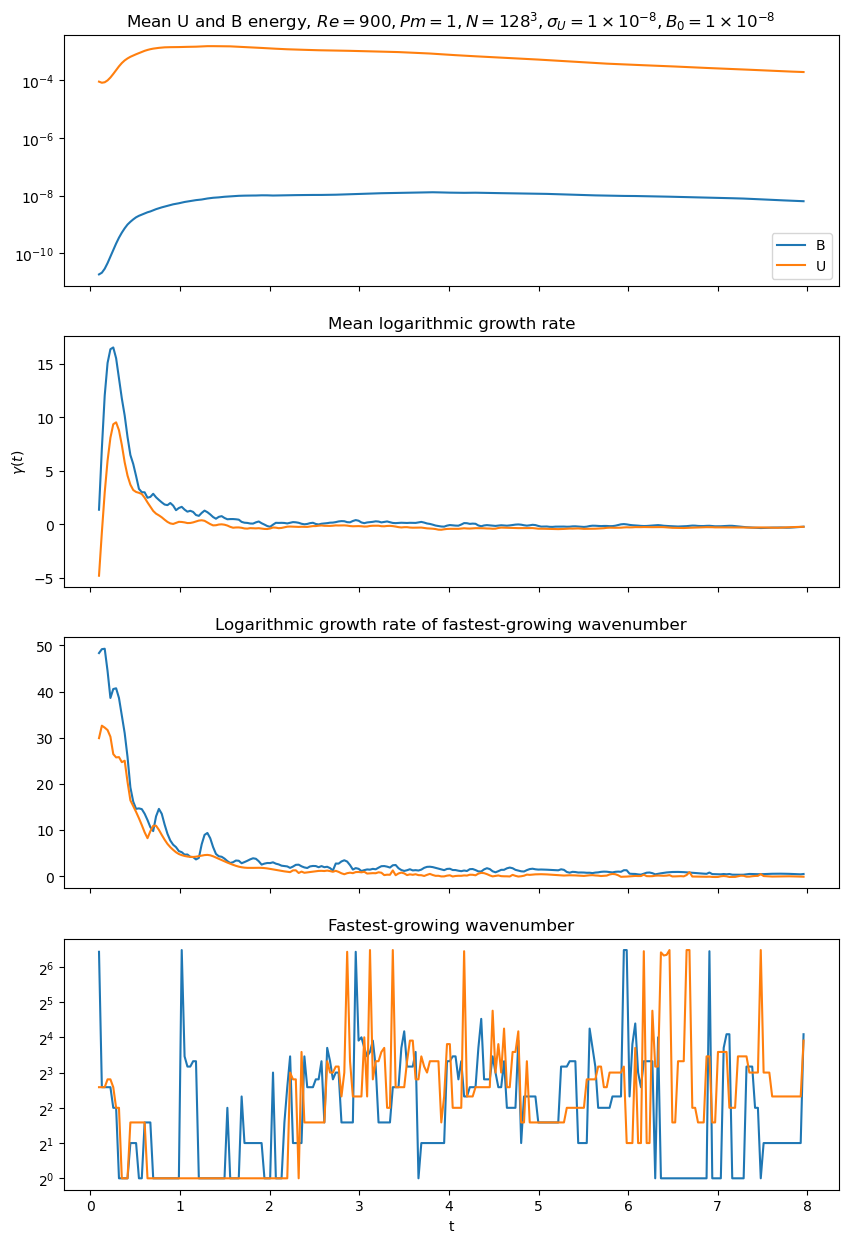

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(10, 15))
ax1.plot(ts, B_t, label="B")
ax1.plot(ts, U_t, label="U")
ax1.set_yscale("log", base=10)
ax1.legend()
ax1.set_title(r"Mean U and B energy, $Re = 900, Pm = 1, N = 128^3, \sigma_U = 1\times10^{-8}, B_0 = 1\times10^{-8}$")
ax2.plot(ts, gB_t, label="B")
ax2.plot(ts, gU_t, label="U")
ax2.set_ylabel(r"$\gamma(t)$")
ax2.set_title(r"Mean logarithmic growth rate")
ax3.plot(ts, gB_kmaxt, label="B")
ax3.plot(ts, gU_kmaxt, label="U")
ax3.set_title("Logarithmic growth rate of fastest-growing wavenumber")
ax4.plot(ts, K_tmaxgB, label="B")
ax4.plot(ts, K_tmaxgU, label="U")
ax4.set_title("Fastest-growing wavenumber")
ax4.set_yscale("log", base=2)
ax4.set_xlabel("t")
plt.savefig("gUB_t.pdf")